In [3]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
df = pd.read_csv("wynikowy_superclear.csv", sep=";", decimal=",")

In [5]:
df.head()

,ID,DataUrodzenia,Plec,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,...,MeasuredCircumferenceofRightArm,MeasuredCircumferenceofLeftArm,MeasuredCircumferenceofRightThigh,MeasuredCircumferenceofLeftThigh,GrowthScore,ObesityDegreeofaChild,LowerLimit_ObesityDegreeofaChildNormalRange_,UpperLimit_ObesityDegreeofaChildNormalRange_,InBodyType,LocalID
0,101,14.06.2000,M,182.0,96.0,39.0,86.0,89.0,83.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,14.06.2000,M,183.0,95.4,39.0,86.0,92.0,80.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,14.06.2000,M,189.0,96.0,39.0,84.5,89.5,88.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,14.06.2000,M,183.1,96.5,40.0,91.0,94.0,90.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101,14.06.2000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
do_kor_antropo=df.columns[list(range(3,6))+[27,36,75,79]]

In [7]:
#sns.heatmap(df[do_kor_antropo].corr(), annot=True)

In [8]:
#sns.pairplot(df[do_kor_antropo])

In [9]:
df["Plec"] = np.where(df["Plec"] == "F", 0, 1)
dclas=df[df.columns[2:24]]

In [10]:
#df[df.columns[27]<df.columns[28]]
# if TBW_TotalBodyWater_ is higher than LowerLimit_TBWNormalRange_ and lower than UpperLimit_TBWNormalRange then it is 1 else 0
df["TBW_Normal"] = np.where((df["TBW_TotalBodyWater_"] > df["LowerLimit_TBWNormalRange_"]) & (df["TBW_TotalBodyWater_"] < df["UpperLimit_TBWNormalRange_"]), 1, 0)

In [11]:
dclas.insert(22,"OdpowiednieNawodnienie",df["TBW_Normal"],True)

In [12]:
dclas

,Plec,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,ObwodPasa,ObwodBioder,ObwodUda,ObwodRamienia,...,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi,Age,Weight,OdpowiednieNawodnienie
0,1,182.0,96.0,39.0,86.0,89.0,83.0,89.0,50.0,29.0,...,21.0,14.0,10.0,19.0,128.0,69.0,66.0,NaN,NaN,0
1,1,183.0,95.4,39.0,86.0,92.0,80.0,100.0,54.0,29.0,...,20.0,12.0,13.5,26.0,114.5,71.5,85.5,NaN,NaN,0
2,1,189.0,96.0,39.0,84.5,89.5,88.0,103.0,55.5,29.5,...,20.5,9.0,12.0,18.5,NaN,NaN,NaN,NaN,NaN,0
3,1,183.1,96.5,40.0,91.0,94.0,90.0,104.0,62.0,32.0,...,21.8,17.0,15.0,26.0,138.0,59.0,78.0,NaN,NaN,0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,163.6,84.4,28.5,67.5,68.0,67.0,95.0,51.0,24.0,...,17.5,17.0,13.0,17.0,118.0,64.0,90.5,NaN,NaN,0
1544,0,164.0,85.0,30.0,69.5,70.5,64.0,92.0,51.0,24.0,...,17.0,12.5,11.5,14.0,117.0,64.0,91.0,NaN,NaN,0
1545,0,164.0,85.6,30.5,71.0,72.0,70.0,97.0,56.0,23.5,...,18.7,15.0,17.0,20.0,NaN,NaN,NaN,NaN,NaN,0
1546,0,163.5,84.6,30.0,72.0,73.0,68.0,97.0,53.0,24.5,...,16.8,19.0,12.0,13.0,127.0,75.0,86.0,NaN,NaN,0


In [13]:
def ocena(errorMatrix, klasyfikator="Brak Nazwy"):
    tp=errorMatrix[0,0]
    fp=errorMatrix[0,1]
    fn=errorMatrix[1,0]
    tn=errorMatrix[1,1]
    acc=(tp+tn)/(tp+tn+fp+fn)
    sen=tp/(tp+fn)
    spe=tn/(tn+fp)
    pre=tp/(tp+fp)
    f1=2*tp/(2*tp+fp+fn)
    print("Klasyfikator:", klasyfikator)
    print("Accuracy:", acc)
    print("Sensitivity:", sen)
    print("Specificity:", spe)
    print("Precision:", pre)
    print("f1:", f1)

In [14]:
dclas=dclas.dropna()
X_train, X_test, y_train, y_test = train_test_split(dclas[dclas.columns[:-1]], dclas["OdpowiednieNawodnienie"], test_size=0.2, random_state=42)

In [15]:
k=5
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, knn.predict(X_test))

In [17]:
ocena(errorMatrix, "KNN")

Klasyfikator: KNN
Accuracy: 0.7857142857142857
Sensitivity: 0.6666666666666666
Specificity: 0.875
Precision: 0.8
f1: 0.7272727272727273


Klasyfikator: DecisionTree
Accuracy: 0.5
Sensitivity: 0.4
Specificity: 0.75
Precision: 0.8
f1: 0.5333333333333333


[Text(156.24, 199.32, 'X[6] <= -0.234\ngini = 0.499\nsamples = 52\nvalue = [27, 25]'),
 Text(89.28, 163.07999999999998, 'X[3] <= 0.39\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(66.96000000000001, 126.83999999999999, 'X[17] <= -1.561\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(44.64, 90.6, 'X[2] <= -0.784\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(22.32, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(89.28, 90.6, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(111.6, 126.83999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 163.07999999999998, 'X[16] <= -0.331\ngini = 0.391\nsamples = 30\nvalue = [8, 22]'),
 Text(156.24, 126.83999999999999, 'X[17] <= 0.72\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(178.56, 90.6, 'X[1] <= 0.684\ngini = 0.375\nsa

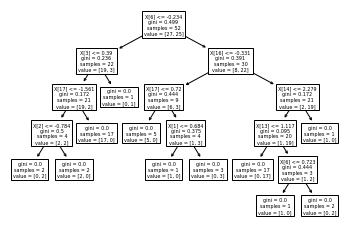

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, dtree.predict(X_test))
ocena(errorMatrix, "DecisionTree")
tree.plot_tree(dtree)

<h1><center>13.05</center></h1>

In [23]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=dtree, max_features=22)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, bag.predict(X_test))
ocena(errorMatrix, "Bagging")


Klasyfikator: Bagging
Accuracy: 0.7142857142857143
Sensitivity: 0.5714285714285714
Specificity: 0.8571428571428571
Precision: 0.8
f1: 0.6666666666666666


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, rf.predict(X_test))
ocena(errorMatrix, "RandomForest")


Klasyfikator: RandomForest
Accuracy: 0.7142857142857143
Sensitivity: 0.5714285714285714
Specificity: 0.8571428571428571
Precision: 0.8
f1: 0.6666666666666666


Klasyfikator: AdaBoost
Accuracy: 0.5714285714285714
Sensitivity: 0.4444444444444444
Specificity: 0.8
Precision: 0.8
f1: 0.5714285714285714


[Text(152.62941176470588, 199.32, 'X[6] <= -0.234\ngini = 0.499\nsamples = 52\nvalue = [0.519, 0.481]'),
 Text(78.7764705882353, 163.07999999999998, 'X[3] <= 0.39\ngini = 0.236\nsamples = 22\nvalue = [0.365, 0.058]'),
 Text(59.082352941176474, 126.83999999999999, 'X[17] <= -1.561\ngini = 0.172\nsamples = 21\nvalue = [0.365, 0.038]'),
 Text(39.38823529411765, 90.6, 'X[2] <= -0.784\ngini = 0.5\nsamples = 4\nvalue = [0.038, 0.038]'),
 Text(19.694117647058825, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0.0, 0.038]'),
 Text(59.082352941176474, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0.038, 0.0]'),
 Text(78.7764705882353, 90.6, 'gini = 0.0\nsamples = 17\nvalue = [0.327, 0.0]'),
 Text(98.47058823529412, 126.83999999999999, 'gini = -0.0\nsamples = 1\nvalue = [0.0, 0.019]'),
 Text(226.4823529411765, 163.07999999999998, 'X[16] <= -0.331\ngini = 0.391\nsamples = 30\nvalue = [0.154, 0.423]'),
 Text(157.5529411764706, 126.83999999999999, 'X[17] <= 0.72\ngini = 0.444\nsamp

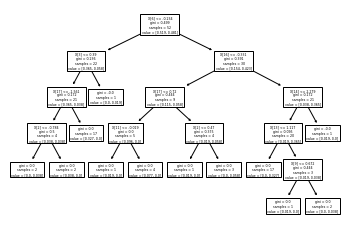

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtree, n_estimators=50)
ada.fit(X_train, y_train)
ada.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, ada.predict(X_test))
ocena(errorMatrix, "AdaBoost")
tree.plot_tree(ada.estimators_[0])

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM linear")


Klasyfikator: SVM linear
Accuracy: 0.6428571428571429
Sensitivity: 0.5
Specificity: 0.8333333333333334
Precision: 0.8
f1: 0.6153846153846154


In [44]:
svc = SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM radial")


Klasyfikator: SVM radial
Accuracy: 0.7857142857142857
Sensitivity: 0.6666666666666666
Specificity: 0.875
Precision: 0.8
f1: 0.7272727272727273


In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.636 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.636 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.636 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.636 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.600 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.600 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.636 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [57]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [58]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, grid.predict(X_test)))

In [59]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, gamma=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM linear")

Klasyfikator: SVM linear
Accuracy: 0.6428571428571429
Sensitivity: 0.5
Specificity: 0.8333333333333334
Precision: 0.8
f1: 0.6153846153846154


In [60]:
svc = SVC(kernel='poly', C=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM polynomial")

Klasyfikator: SVM polynomial
Accuracy: 0.5714285714285714
Sensitivity: 0.4444444444444444
Specificity: 0.8
Precision: 0.8
f1: 0.5714285714285714


In [65]:
param_grid = {'C': [0.01,0.1, 1, 5,10],
              'kernel': ['poly'],
              'degree': [0.5,1,2,3,5]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...C=0.01, degree=0.5, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END ...C=0.01, degree=0.5, kernel=poly;, score=0.545 total time=   0.0s
[CV 3/5] END ...C=0.01, degree=0.5, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5] END ...C=0.01, degree=0.5, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END ...C=0.01, degree=0.5, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.01, degree=1, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.01, degree=1, kernel=poly;, score=0.545 total time=   0.0s
[CV 3/5] END .....C=0.01, degree=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5] END .....C=0.01, degree=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END .....C=0.01, degree=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.01, degree=2, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.01, degree=2, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'degree': [0.5, 1, 2, 3, 5], 'kernel': ['poly']},
             verbose=3)

In [66]:
grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'poly'}

In [67]:
svc = SVC(kernel='poly', C=1, degree=1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM polynomial")


Klasyfikator: SVM polynomial
Accuracy: 0.7857142857142857
Sensitivity: 0.6666666666666666
Specificity: 0.875
Precision: 0.8
f1: 0.7272727272727273


In [70]:
param_grid = {'C': [0.01,0.1, 1, 5,10],
              'gamma': [0.01,0.1,0.5,1,2,3,10,30]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.545 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.545 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.545 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.1;, score=0.545 total time=   0.0s
[CV 3/5] END .................C=0.01, gamma=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END .................C=0.01, gamma=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END .................C=0.01, gamma=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.5;, score=0.545 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.5

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'gamma': [0.01, 0.1, 0.5, 1, 2, 3, 10, 30]},
             verbose=3)

In [71]:
grid.best_params_

{'C': 5, 'gamma': 0.01}

In [72]:
svc = SVC(kernel='rbf', C=5, gamma=0.01)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
errorMatrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
ocena(errorMatrix, "SVM radial")


Klasyfikator: SVM radial
Accuracy: 0.7857142857142857
Sensitivity: 0.6666666666666666
Specificity: 0.875
Precision: 0.8
f1: 0.7272727272727273
